# Modelado de Robots

Recordando la práctica anterior, tenemos que la ecuación diferencial que caracteriza a un sistema masa-resorte-amoritguador es:

$$
m \ddot{x} + c \dot{x} + k x = F
$$

y revisamos 3 maneras de obtener el comportamiento de ese sistema, sin embargo nos interesa saber el comportamiento de un sistema mas complejo, un robot; empezaremos con un pendulo simple, el cual tiene la siguiente ecuación de movimiento:

$$
m l^2  \ddot{q} + m g l \cos{q} = \tau
$$

Como podemos ver, son similares en el sentido de que involucran una sola variable, sin embargo, en la segunda ecuación, nuestra variable esta involucrada adentro de una función no lineal ($\cos{q}$), por lo que nuestra ecuación diferencial es no lineal, y por lo tanto _no_ podemos usar el formalismo de función de transferencia para resolverla; tenemos que usar la función ```odeint``` para poder resolverla.

Como es de segundo grado, tenemos que dividir nuestra ecuación diferencial en dos mas simples, por lo tanto usaremos el siguiente truco:

$$
\frac{d}{dt} q = \dot{q}
$$

entonces, tenemos dos ecuaciones diferenciales, por lo que podemos resolver dos incognitas $q$ y $\dot{q}$.

Utilizando nuestros conocimientos de algebra lineal, podemos acomodar nuestro sistema de ecuaciones en una matriz, de tal manera que si antes teniamos que:

$$
\begin{align}
\frac{d}{dt} q &= \dot{q} \\
\frac{d}{dt} \dot{q} &= \ddot{q} = \frac{\tau  - m g l \cos{q}}{ml^2}
\end{align}
$$

Por lo que podemos ver que nuestro sistema de ecuaciones tiene un estado mas grande que antes; la ecuación diferencial que teniamos como no lineal, de segundo orden, podemos escribirla como no lineal, de primer orden siempre y cuando nuestro estado sea mas grande.

Definamos a lo que nos referimos con estado:

$$
x =
\begin{pmatrix}
q \\
\dot{q}
\end{pmatrix}
$$

con esta definición de estado, podemos escribir el sistema de ecuaciónes de arriba como:

$$
\frac{d}{dt} x = \dot{x} = \frac{d}{dt}
\begin{pmatrix}
q \\
\dot{q}
\end{pmatrix} =
\begin{pmatrix}
\dot{q} \\
\frac{\tau  - m g l \cos{q}}{ml^2}
\end{pmatrix}
$$

o bien $\dot{x} = f(x)$, en donde $f(x)$ es una función vectorial, o bien, un vector de funciones:

$$
f(x) =
\begin{pmatrix}
\dot{q} \\
\frac{\tau  - m g l \cos{q}}{ml^2}
\end{pmatrix}
$$

Por lo que ya estamos listos para simular este sistema mecánico, con la ayuda de ```odeint()```.

In [1]:
from scipy.integrate import odeint

In [2]:
from numpy import linspace

In [3]:
def f(x, t):
    from numpy import cos
    q, q̇ = x
    τ = 0
    m = 1
    g = 9.81
    l = 1
    return [q̇, τ - m*g*l*cos(q)/(m*l**2)]

In [5]:
ts = linspace(0, 10, 100)
x0 = [0, 0]

In [39]:
xs = odeint(func = f, y0 = x0, t = ts)
qs, q̇s = list(zip(*xs.tolist()))

In [19]:
%matplotlib inline
from matplotlib.pyplot import style, plot, figure
style.use("ggplot")

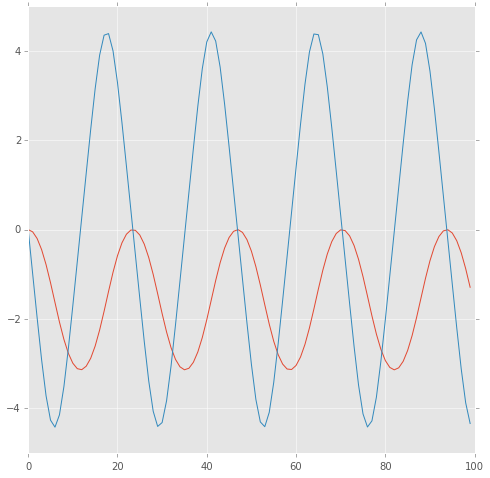

In [21]:
fig1 = figure(figsize = (8, 8))

ax1 = fig1.gca()

ax1.plot(xs);

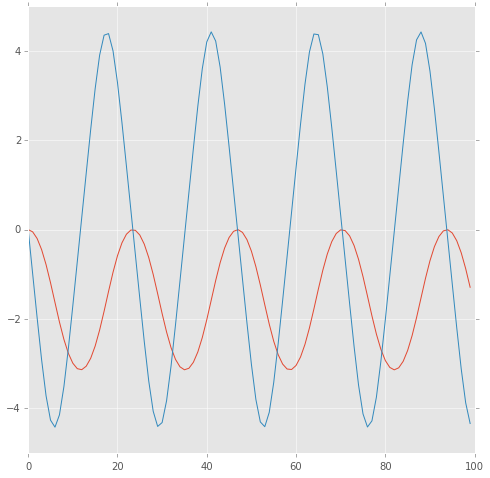

In [41]:
fig2 = figure(figsize = (8, 8))

ax2 = fig2.gca()

ax2.plot(qs)
ax2.plot(q̇s);

In [43]:
from matplotlib import animation
from numpy import sin, cos, arange

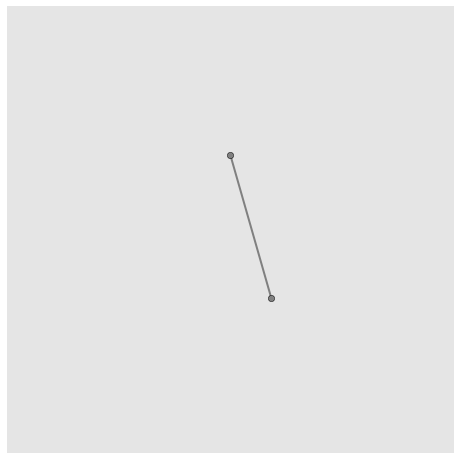

In [48]:
# Se define el tamaño de la figura
fig = figure(figsize=(8, 8))

# Se define una sola grafica en la figura y se dan los limites de los ejes x y y
axi = fig.add_subplot(111, autoscale_on=False, xlim=(-1.5, 1.5), ylim=(-2, 1))

# Se hacen invisibles los ejes
axi.axes.get_xaxis().set_visible(False)
axi.axes.get_yaxis().set_visible(False)

# Se quitan los bordes de la grafica
axi.axes.spines["right"].set_color("none")
axi.axes.spines["left"].set_color("none")
axi.axes.spines["top"].set_color("none")
axi.axes.spines["bottom"].set_color("none")

# Se utilizan graficas de linea para el eslabon del pendulo
linea, = axi.plot([], [], "-o", lw=2, color='gray')

def init():
    # Esta funcion se ejecuta una sola vez y sirve para inicializar el sistema
    linea.set_data([], [])
    return linea

def animate(i):
    # Esta funcion se ejecuta para cada cuadro del GIF
    
    # Se obtienen las coordenadas x y y para el eslabon
    xs, ys = [[0, cos(qs[i])], [0, sin(qs[i])]]
    linea.set_data(xs, ys)
    
    return linea

# Se hace la animacion dandole el nombre de la figura definida al principio, la funcion que
# se debe ejecutar para cada cuadro, el numero de cuadros que se debe de hacer, el periodo 
# de cada cuadro y la funcion inicial
ani = animation.FuncAnimation(fig, animate, arange(1, len(qs)), interval=25,
                              blit=True, init_func=init)

# Se guarda el GIF en el archivo indicado
ani.save('./imagenes/pendulo-simple.gif', writer='imagemagick');

![](./imagenes/pendulo-simple.gif)